In [1]:
## Importing Packages
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf # linear modeling
import matplotlib.pyplot as plt # plotting
import matplotlib.lines as mlines
import statsmodels.api as sm
import seaborn as sns
import warnings

In [2]:
## Loading Data
por = pd.read_csv("student-alcohol-consumption/student-mat.csv")
math = pd.read_csv("student-alcohol-consumption/student-por.csv")

In [3]:
## Combining 2 dataframe
df = pd.concat([por,math], sort= True, ignore_index=False)

## Make a copy of the dataframe for statistical analysis
df_stats = pd.concat([por,math], sort= True, ignore_index=False)

## Make a copy of the dataframe to print out
df_nice = pd.concat([por,math], sort= True, ignore_index=False)

In [4]:
df_nice = df.rename({'Dalc':'Weekday Alc Consumption (1=low, 5=high)', 'Fedu':'Feather Education (0=none, 5=higher edu)', 'Fjob':'Father Job', 'G1':'Period 1 Grades (0-20 Scale)', 
               'G2':'Period 2 Grades (0-20 Scale)', 'G3':'Final Grade (0-20 Scale)', 'Medu':'Mother Education (0=none, 5=higher edu)', 'Mjob':'Mother Job', 'Pstatus':'Parents Living Together(T), Apart(A)',
               'Walc':'Weekend Alc Consumption (1=low, 5=high)', 'absences':'Number of School Absences', 'activities':'Extra Curricular Activities', 'address':'Urban(U)/Rural(R) Location', 
                'age': 'Student Age', 'failures':'Number of Failures', 'famrel':'Family Relationship Quality (1=not good, 5=good)', 'famsize':'Family Size (LE3:<=3, GT3:>3', 'famsup':'Family Education Support', 'freetime':'Free Time (1=low, 5=high)',
                'goout':'Go Out w/ Friends (1=low, 5=high)', 'guardian':'Guardian', 'health':'Current Health Status (1=bad, 5=good)', 'higher':'Wants to take Higher Education', 'internet':'Internet', 
                'nursery':'Attended Nursery School', 'paid':'Paid for Extra Classes', 'reason':'Reason to Choose this School', 'romantic':'In a Romantic Relationship', 'school':'Student School (GP=Gabriel Pereira, MS=Mousinho da Silveira)', 
                'schoolsup':'Extra Educational Support', 'sex':'Student Sex', 'studytime':'Weekly Studytime', 'traveltime':'Travel Time to School (1=<15 min, 2=15-30 min, 3=30 min-1 hour, 4=>1 hour)'}, axis='columns')


In [5]:
## Changing numeric variables to categorical variables

df_stats['internet'] = df_stats.internet.factorize( ['yes', 'no'] )[0]
df_stats['activities'] = df_stats.activities.factorize( ['yes', 'no'] )[0]
df_stats['romantic'] = df_stats.romantic.factorize( ['yes', 'no'] )[0]
df_stats["Dalc"] = df_stats["Dalc"].values
df_stats["goout"] = df_stats["goout"].values.astype(str).astype(int)

## Creating new variables "social index"
df_stats["index"] = df_stats['goout'] * 0.25 + df_stats['internet'] * 0.02 + df_stats['romantic'] * 0.03 + df_stats['activities'] * -0.01
df_nice["Social Index"] = df_stats["index"]

## Creating new variables "drinking index"
df_stats["drinking"] = (df_stats["Walc"] * 5 + df_stats["Dalc"] * 2) / 7 
df_nice["Drinking Index"] = df_stats["drinking"]


df_nice.head()

,Course,"Weekday Alc Consumption (1=low, 5=high)","Feather Education (0=none, 5=higher edu)",Father Job,Period 1 Grades (0-20 Scale),Period 2 Grades (0-20 Scale),Final Grade (0-20 Scale),"Mother Education (0=none, 5=higher edu)",Mother Job,"Parents Living Together(T), Apart(A)",...,Paid for Extra Classes,Reason to Choose this School,In a Romantic Relationship,"Student School (GP=Gabriel Pereira, MS=Mousinho da Silveira)",Extra Educational Support,Student Sex,Weekly Studytime,"Travel Time to School (1=<15 min, 2=15-30 min, 3=30 min-1 hour, 4=>1 hour)",Social Index,Drinking Index
0,Math,1,4,teacher,5,6,6,4,at_home,A,...,no,course,no,GP,yes,F,2,2,1.00,1.000000
1,Math,1,1,other,5,5,6,1,at_home,T,...,no,course,no,GP,no,F,2,1,0.77,1.000000
2,Math,2,1,other,7,8,10,1,at_home,T,...,yes,other,no,GP,yes,F,2,1,0.52,2.714286
3,Math,1,2,services,15,14,15,4,health,T,...,yes,home,yes,GP,no,F,3,1,0.54,1.000000
4,Math,1,3,other,6,10,10,3,other,T,...,yes,home,no,GP,no,F,2,1,0.50,1.714286


In [6]:
df_stats['Dalc'] = df_stats.Dalc.astype('category')
df_stats['Walc'] = df_stats.Walc.astype('category')
df_stats['health'] = df_stats.health.astype('category')
df_stats['goout'] = df_stats.goout.astype('category')
df_stats['freetime'] = df_stats.freetime.astype('category')
df_stats['famrel'] = df_stats.famrel.astype('category')
df_stats['studytime'] = df_stats.studytime.astype('category')
df_stats['traveltime'] = df_stats.traveltime.astype('category')
df_stats['Fedu'] = df_stats.Fedu.astype('category')
df_stats['Medu'] = df_stats.Medu.astype('category')


Text(0.5, 1.0, 'Correlation Matrix')

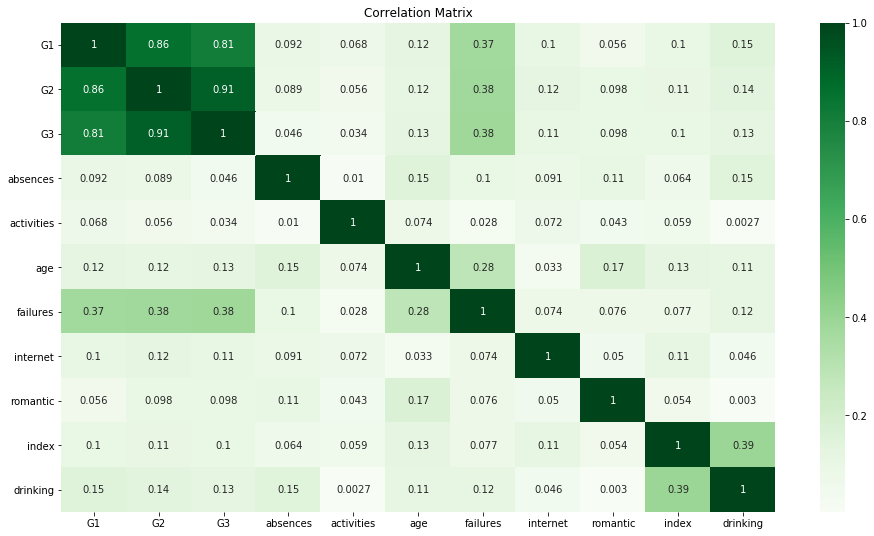

In [7]:
plt.figure(figsize=(16,9))
sns.heatmap(df_stats.corr().abs(), annot=True, cmap="Greens").set_title('Correlation Matrix')
#plt_corr_dengue.savefig('data/img/correlation_dengue.png', dpi=plt_corr_dengue.dpi)

In [8]:
lm = smf.ols(formula='drinking ~ school + sex + age + address + Pstatus + Medu + Fedu + Mjob + Fjob + reason + guardian + traveltime + studytime + failures + schoolsup + famsup + paid + activities + nursery + higher + internet + romantic + famrel + freetime + goout + health + absences + Course + G1 + G2 + G3 + index', data = df_stats).fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               drinking   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     10.04
Date:                Sat, 09 Mar 2019   Prob (F-statistic):           5.42e-69
Time:                        20:42:22   Log-Likelihood:                -1324.2
No. Observations:                1044   AIC:                             2774.
Df Residuals:                     981   BIC:                             3086.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0491      0.692      0.071      0.943      -1.310       1.408
school[T.MS]            -0.0247      0.080     -0.308      0.758      -0.182       0.133
sex[T.M]                 0.5785      0.064      9.058      0.000       0.453       0.704
address[T.U]            -0.0899      0.072     -1.244      0.214      -0.232       0.052
Pstatus[T.T]            -0.0030      0.092     -0.033      0.974      -0.184       0.178
Medu[T.1]               -0.4951      0.317     -1.562      0.119      -1.117       0.127
Medu[T.2]               -0.7427      0.318     -2.338      0.020      -1.366      -0.119
Medu[T.3]               -0.5564      0.322     -1.730      0.084      -1.188       0.075
Medu[T.4]               -0.7202      0.331     -2.177      0.030      -1.370      -0.071
Fedu[T.1]                0.9746      0.313      3.115      0.002       0.361       1.589
Fedu[T.2]                0.9846      0.315      3.122      0.002       0.366       1.603
Fedu[T.3]                0.9908      0.319      3.105      0.002       0.365       1.617
Fedu[T.4]                1.0981      0.326      3.366      0.001       0.458       1.738
Mjob[T.health]          -0.1133      0.147     -0.773      0.440      -0.401       0.175
Mjob[T.other]           -0.1252      0.086     -1.461      0.144      -0.293       0.043
Mjob[T.services]        -0.0702      0.102     -0.689      0.491      -0.270       0.130
Mjob[T.teacher]          0.1071      0.139      0.771      0.441      -0.166       0.380
Fjob[T.health]           0.0755      0.197      0.383      0.702      -0.312       0.463
Fjob[T.other]            0.2310      0.127      1.823      0.069      -0.018       0.480
Fjob[T.services]         0.4249      0.132      3.209      0.001       0.165       0.685
Fjob[T.teacher]         -0.1963      0.181     -1.087      0.277      -0.551       0.158
reason[T.home]           0.0606      0.075      0.810      0.418      -0.086       0.208
reason[T.other]          0.2551      0.100      2.553      0.011       0.059       0.451
reason[T.reputation]     0.1065      0.078      1.364      0.173      -0.047       0.260
guardian[T.mother]      -0.1197      0.072     -1.666      0.096      -0.261       0.021
guardian[T.other]       -0.3130      0.136     -2.295      0.022      -0.581      -0.045
traveltime[T.2]         -0.0960      0.067     -1.440      0.150      -0.227       0.035
traveltime[T.3]          0.0844      0.119      0.707      0.480      -0.150       0.319
traveltime[T.4]          0.6384      0.200      3.193      0.001       0.246       1.031
studytime[T.2]          -0.2382      0.071     -3.340      0.001      -0.378      -0.098
studytime[T.3]          -0.3157      0.099     -3.195      0.001      -0.510      -0.122
studytime[T.4]          -0.3672      0.136     -2.695    

In [9]:
df_stats.corr().abs()

,G1,G2,G3,absences,activities,age,failures,internet,romantic,index,drinking
G1,1.000000,0.858739,0.809142,0.092425,0.067962,0.124121,0.374175,0.104772,0.055869,0.101864,0.154532
G2,0.858739,1.000000,0.910743,0.089332,0.056000,0.119475,0.377172,0.122517,0.097719,0.110463,0.138028
G3,0.809142,0.910743,1.000000,0.045671,0.033998,0.125282,0.383145,0.107064,0.098363,0.100047,0.127247
absences,0.092425,0.089332,0.045671,1.000000,0.009998,0.153196,0.099998,0.090652,0.105323,0.063925,0.148002
activities,0.067962,0.056000,0.033998,0.009998,1.000000,0.073648,0.027500,0.072016,0.042559,0.058847,0.002729
age,0.124121,0.119475,0.125282,0.153196,0.073648,1.000000,0.282364,0.033229,0.173800,0.127127,0.113593
failures,0.374175,0.377172,0.383145,0.099998,0.027500,0.282364,1.000000,0.074263,0.076042,0.076624,0.117166
internet,0.104772,0.122517,0.107064,0.090652,0.072016,0.033229,0.074263,1.000000,0.049882,0.112835,0.045739
romantic,0.055869,0.097719,0.098363,0.105323,0.042559,0.173800,0.076042,0.049882,1.000000,0.053963,0.002977
index,0.101864,0.110463,0.100047,0.063925,0.058847,0.127127,0.076624,0.112835,0.053963,1.000000,0.393339


In [10]:
df_nice['prediction'] = pd.DataFrame(lm.predict())

Text(0.5, 1.0, 'Histogram of the Social Index')

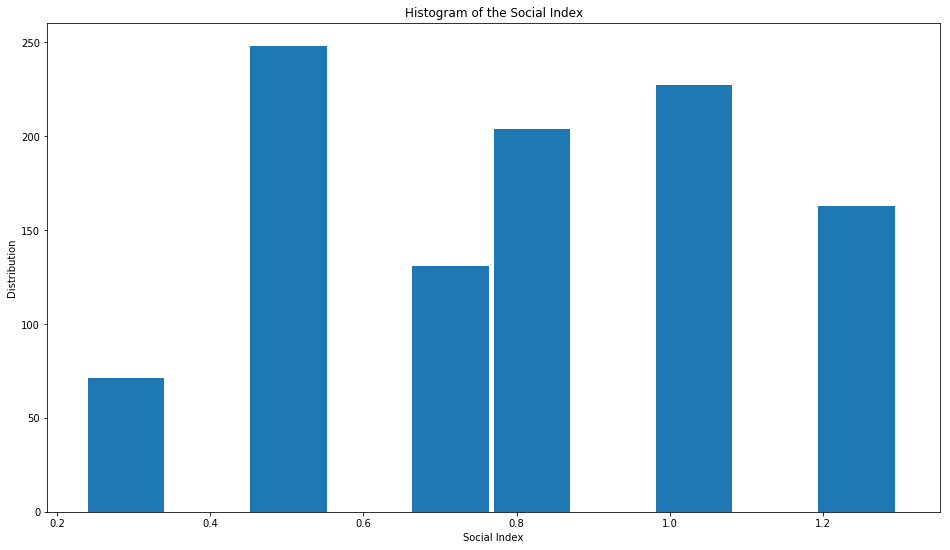

In [11]:
plt.figure(figsize=(16,9))
plt.hist(df_nice["Social Index"], width = 0.1)
plt.xlabel("Social Index")
plt.ylabel("Distribution")
plt.title("Histogram of the Social Index")

Text(0.5, 1.0, 'Scatter Plot of Social Index and DWI')

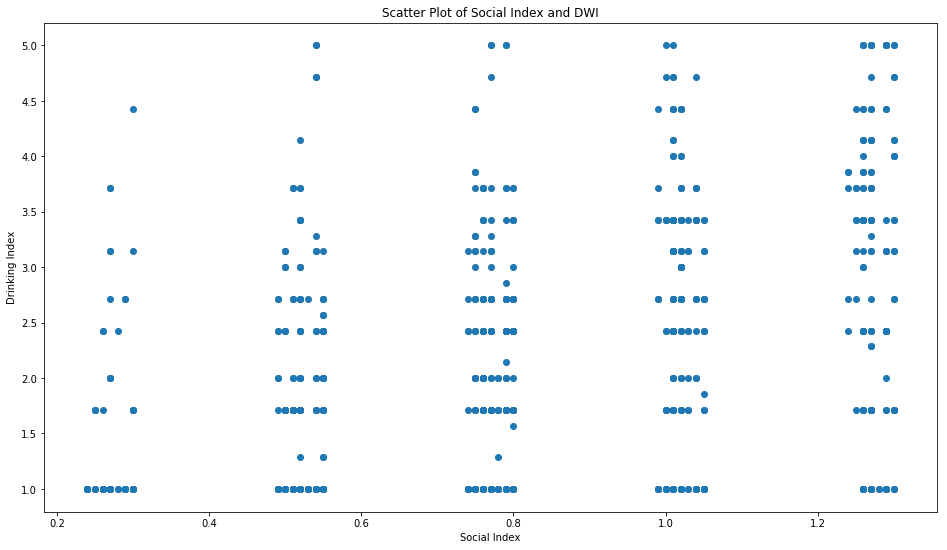

In [14]:
plt.figure(figsize=(16,9))
plt.scatter(df_nice["Social Index"], df_nice["Drinking Index"])
plt.xlabel("Social Index")
plt.ylabel("Drinking Index")
plt.title("Scatter Plot of Social Index and DWI")

In [15]:
def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [ ]:
model = forward_selected(df_stats, "drinking")

print(model.model.formula)
